# <center> Data: Tele Customer Churn

<center> by: Omar Allam 

_________________________________
# Table of contents:
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#prep">Data Wrangling</a></li>
<li><a href="#EDA">EDA (for selecting features) </a></li>
<li><a href="#model">Modeling </a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>


<a id='Intro'></a>
## Introduction:
_________________________________
### 1- Dataset Description:
- It is a data about customers. We want to determine the factors lead to customer churn and predict a model to classify whether the customer will go churn or stay with the company.
_________________________________
### 2- Columns' description:


`gender` : Whether the customer is a male or a female

`SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)

`Partner` : Whether the customer has a partner or not (Yes, No)

`Dependents` : Whether the customer has dependents or not (Yes, No)

`tenure` : Number of months the customer has stayed with the company

`PhoneService` : Whether the customer has a phone service or not (Yes, No)

`MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)

`InternetService`: Customer’s internet service provider (DSL, Fiber optic, No)

`OnlineSecurity`:Whether the customer has online security or not (Yes, No, No internet service)

`OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)

`DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)

`TechSupport`:Whether the customer has tech support or not (Yes, No, No internet service)

`StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)

`StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)

`Contract`: The contract term of the customer (Month-to-month, One year, Two year)

`PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)

`PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

`MonthlyCharges`: The amount charged to the customer monthly

`TotalCharges`: The total amount charged to the customer

`Churn`: Whether the customer churned or not (Yes or No)

_______________________

<a id='prep'></a>
## Data Preperation:


__________________________________

### 1- Loading Data & Libraries:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (11)\WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns',None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2- Cleaning:

###### General Cleaning Questions: 

* missing values?
* wrong datatypes for columns?
* complete duplicates in the data?
* outliers in each column?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

######  There is no missing values

######  `customerID` has no usage:

In [ ]:
df =df.drop(columns = 'customerID',axis = 1)

###### `TotalCharges`  & `SeniorCitizen` have wrong datatype:

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges']

ValueError: Unable to parse string " " at position 488

###### Due to the previous error message I decided to use `str.strip()` first, instead of using `errors = coerce` and lose those values as `NaNs` 

In [ ]:
df['TotalCharges'] = df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].dtypes


dtype('O')

In [ ]:
df[df.duplicated()]
df = df.drop_duplicates() # not sure

###### before dropping `customerID`, data has no duplicates ... but after dropping it ... new duplicates found. 
###### I was confused whether to drop them or keep them to add weight to their matched labels ... but I finally dropped them.

___________________________________________________________________

###### I want to check the following:


- Is `MonthlyCharges`* `tenure` = `TotalCharges` or not?


- Does data with `PhoneService`= `No` have `No phone service` in other related phone-columns or not? *(this is only for validating the data)*


- Does data with `InternetServices`= `No` have `No Internet service` in other related Internet-columns or not? *(this is only for validating the data)*


- Is there any rows with ( `InternetServices`= `No` & `InternetServices`= `No` ) which can be useless row? 

In [ ]:
#################### first check #################################:

# we want to see what True TotalCharges exist
df[df['MonthlyCharges'] * df['tenure'] == df['TotalCharges'] ] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,No
7010,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7016,Female,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7018,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


In [ ]:
# this is to see how far the True total charges differ from the actual charges.

df['True_TotalCharges'] = df['MonthlyCharges'] * df['tenure']

(df['TotalCharges'] - df['True_TotalCharges']).describe() 


# both mean and median is about zero ... this means the Charges are in-correctly represented


count    7010.000000
mean        0.153673
std        67.360794
min      -370.850000
25%       -28.787500
50%         0.000000
75%        28.800000
max       373.250000
dtype: float64

In [ ]:
df = df.drop(['MonthlyCharges','TotalCharges'],axis = 1)

df.rename(columns = {'True_TotalCharges':'TotalCharges'},inplace =True)


________________________________


In [ ]:
#################### second check #################################:

df[df['PhoneService']=='No'].nunique()['PhoneService':'MultipleLines']

# data is True as the phone_column has 1 unique value only "No phone Service"

PhoneService     1
MultipleLines    1
dtype: int64

________________________________


In [ ]:
#################### third check #################################:

df[df['InternetService']=='No'].nunique()['InternetService' :'StreamingMovies']

# data is True as internet_columns have 1 unique value only "No Internet Service"

InternetService     1
OnlineSecurity      1
OnlineBackup        1
DeviceProtection    1
TechSupport         1
StreamingTV         1
StreamingMovies     1
dtype: int64

________________________________


In [ ]:
#################### fourth check #################################:


df[df['PhoneService']=='No'] [['InternetService']].value_counts()

# There isn't any rows with (No PhoneServices & No InternetServices) ... which we can drop them as being uselesss.  



InternetService
DSL                682
dtype: int64

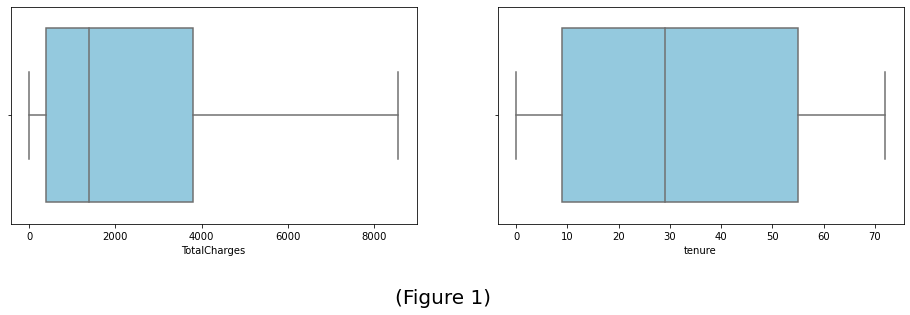

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (16,4))
sns.boxplot(ax = ax[0],data=df,x ='TotalCharges',color = 'skyblue');
sns.boxplot(ax = ax[1],data=df,x ='tenure',color = 'skyblue');
plt.suptitle('(Figure 1)',y=-0.1, size =20);

>### our numeric column has no outliers.

##### Cleaning summary:

* `customerID` was dropped.


* `TotalCharges` was converted from `str` to `float`


* `SeniorCitizen` was converted from `int` to `object`


* new `TotalCharges` was introduced as ( `MonthlyCharges` * `tenure` ).


* `MonthlyCharges` was dropped.



_____________________

<a id='EDA'></a>
## EDA (Exploratory Data Analysis):

_____________________

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'TotalCharges'],
      dtype='object')

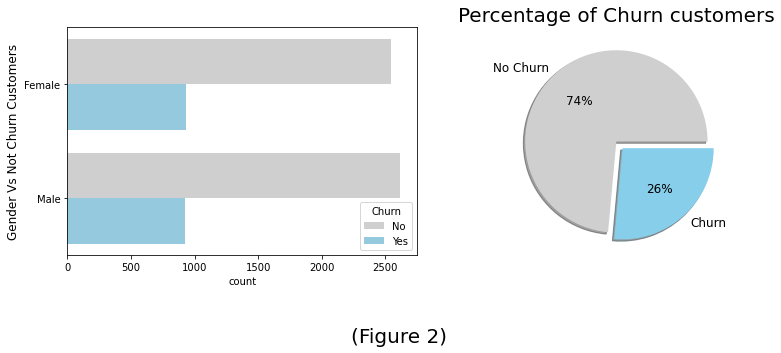

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

data = [ df['Churn'].value_counts()['No'], df['Churn'].value_counts()['Yes'] ]

ax[1].pie(data,labels = ['No Churn','Churn'], explode = [0, 0.1] , autopct='%.0f%%' , shadow = True , colors = ['#CFCFCF','skyblue'],textprops={'fontsize': 12})
ax[1].set_title('Percentage of Churn customers',size = 20)



sns.countplot(ax = ax[0], data = df, y = 'gender', palette = ["#CFCFCF","skyblue" ],hue='Churn')
ax[0].set_ylabel('Gender Vs Not Churn Customers',size=12)

fig.tight_layout(pad=4)
plt.suptitle('(Figure 2)',y=-0.001, size =20);


>### `Gender` data is equally distributed with churn vs no churn data.

In [ ]:
#showing the distributed percentage for `gender`

df_male   = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']
round(df_male.shape[0] / df.shape[0] *100 , 2)

50.43

In [ ]:
#showing the distributed percentage for `SeniorCitizen`

young   = df[df['SeniorCitizen'] == 0]
old = df[df['SeniorCitizen'] == 1]
round(young.shape[0] / df.shape[0] *100 , 2) 

83.75

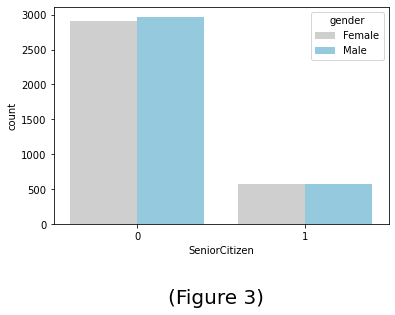

In [ ]:
sns.countplot(data =df , x = 'SeniorCitizen', hue = 'gender',palette = ['#CFCFCF','skyblue']);
plt.suptitle('(Figure 3)',y=-0.1, size =20);

>### `SeniorCitizen` is balanced with `gender` means each CitizenGroup has approximately equal number of males vs females.

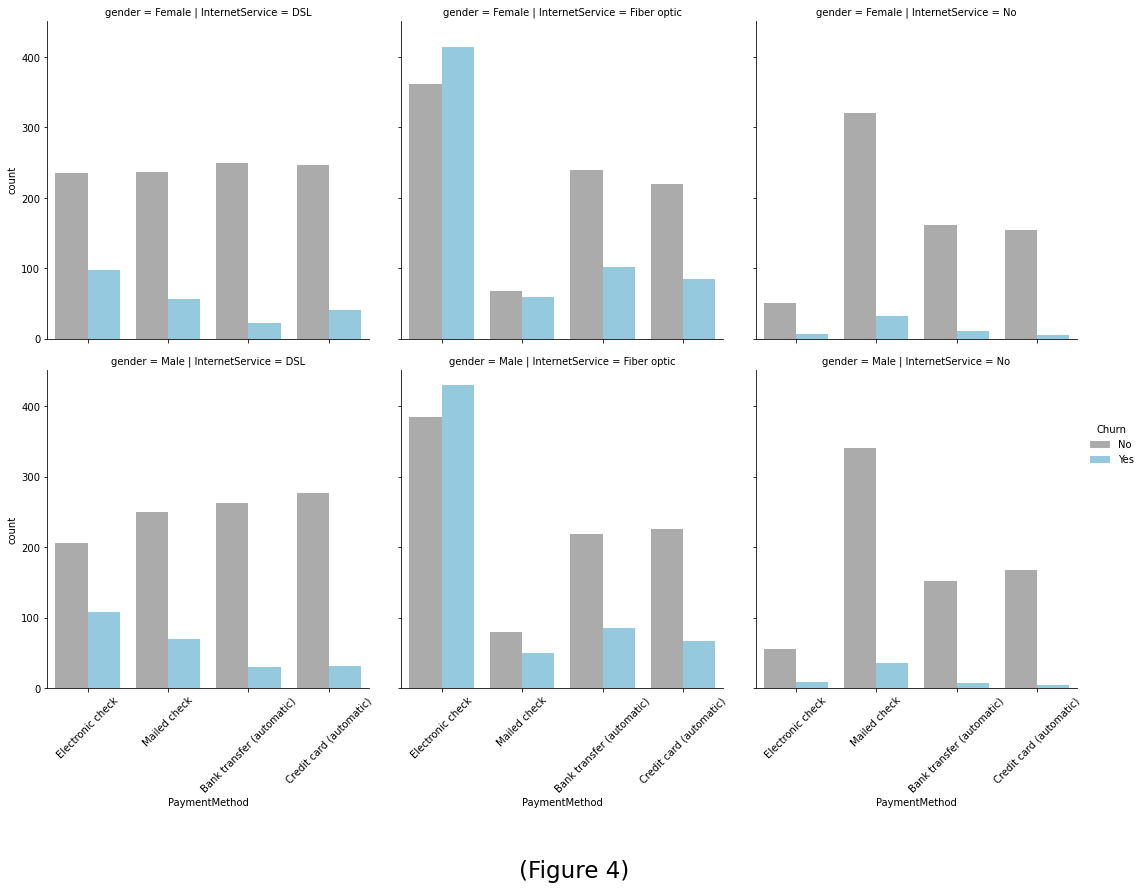

In [ ]:
chart = sns.catplot(kind = 'count',data =df , x= 'PaymentMethod',hue = 'Churn',col = 'InternetService',row = 'gender',palette = ["#ABABAB",'skyblue'])
chart.set_xticklabels(rotation=45)

chart.set_xticklabels(rotation=45);
plt.suptitle('(Figure 4)',y=-0.2, size =23);

>### Again the *50% 50%* of *(male vs female)* applies also in this graph.
    This indicates that data was equally collected part of male with same properities and part of fimale with  same properities ... therefore `gender` column is not effective in predecting `Churn`


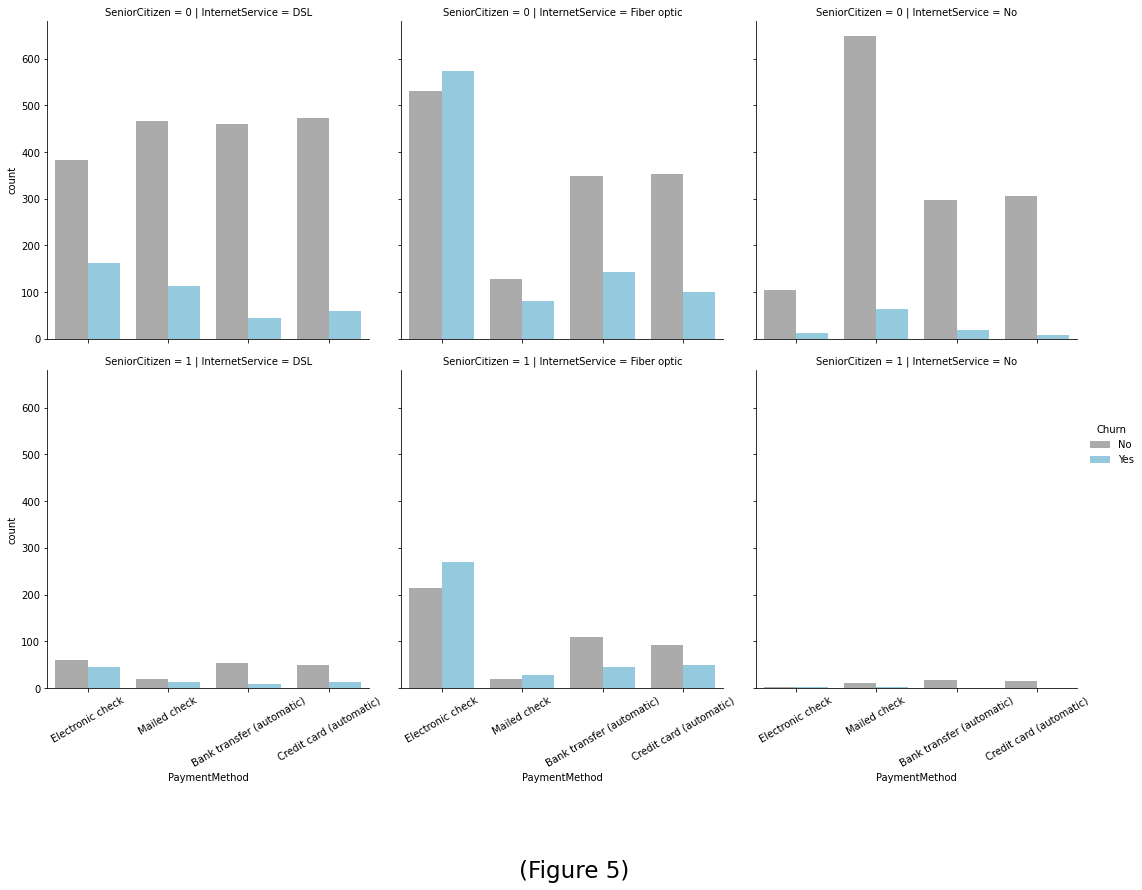

In [ ]:

chart2 = sns.catplot(kind = 'count',data =df , x= 'PaymentMethod',hue = 'Churn',col = 'InternetService',row = 'SeniorCitizen',palette = ["#ABABAB",'skyblue'])

chart2.set_xticklabels(rotation = 30);
plt.suptitle('(Figure 5)',y=-0.2, size =23);

>### The same insights of `(Figure 4)` applies here to `(Figure 5)` except that is is for `SeniorCitizen` instead of `gender` 
>    Therefore `SeiorCitizen` column is not effective in predecting `Churn`



>  `(Figure 4)` & `(Figure 5)` strangly shows that people mostly tend to churn if their `InternetServices = 'Fiber 
> optics'` and specially where their `PaymentMethod = 'Electronic check'`
>
> Therfore `PaymentMethod` & `InternetSrervices` will be effective in predicting our target value.

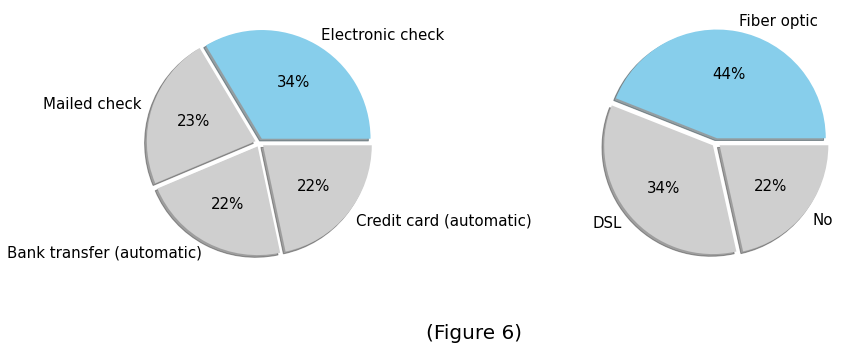

In [ ]:
# showing the % of each of the effective coloumns:

fig,ax = plt.subplots(1,2,figsize=(15,5))

data1 = df['PaymentMethod'].value_counts().values
ax[0].pie(data1,labels = df['PaymentMethod'].value_counts().index, explode = [0.04 ,0.04, 0.04,0.04] , autopct='%.0f%%' , shadow = True , colors = ['skyblue','#CFCFCF','#CFCFCF','#CFCFCF'],textprops={'fontsize': 15});

data2 = df['InternetService'].value_counts().values
ax[1].pie(data2,labels = df['InternetService'].value_counts().index, explode = [0.04 ,0.04, 0.04] , autopct='%.0f%%' , shadow = True , colors = ['skyblue','#CFCFCF','#CFCFCF','#CFCFCF'],textprops={'fontsize': 15});
plt.suptitle('(Figure 6)',y=-0.001, size =20);


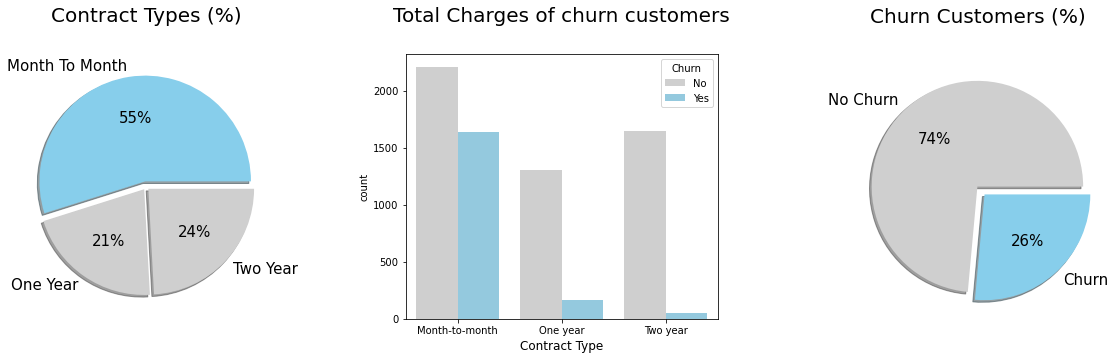

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(17,6))

data = [ df['Churn'].value_counts()['No'], df['Churn'].value_counts()['Yes'] ]
ax[2].pie(data,labels = ['No Churn','Churn'], explode = [0, 0.1] , autopct='%.0f%%' , shadow = True , colors = ['#CFCFCF','skyblue'],textprops={'fontsize': 15})
ax[2].set_title('Churn Customers (%)',size = 20,y=1.1)



data = [ df['Contract'].value_counts()['Month-to-month'], df['Contract'].value_counts()['One year'] , df['Contract'].value_counts()['Two year']  ]
ax[0].pie(data,labels = ['Month To Month','One Year','Two Year'], explode = [0.05, 0.03,0.03] , autopct='%.0f%%' , shadow = True , colors = ['skyblue','#CFCFCF','#CFCFCF'],textprops={'fontsize': 15})
ax[0].set_title('Contract Types (%)',size = 20,y=1.1)


sns.countplot(ax = ax[1], data = df, x = 'Contract', palette = ["#CFCFCF","skyblue" ],hue='Churn')
ax[1].set_title('Total Charges of churn customers',size = 20,y=1.1)
ax[1].set_xlabel('Contract Type',size=12)

fig.tight_layout(pad=4)

> As the gray column in `Month-to_month` is by far higher than other types, `Contract Type` affects churn rate ... it can be one of our features.

> ### Analysis Conclusion:
> `gender` & `SeniorCitizen` initially won't be taken within the features.
>
> we will group the categorical columns into a dataframe to be encoded and used for modeling with our numerical columns.


<a id='model'></a>
## Modeling:

________________________

###  1- Preparing Features:

In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
TotalCharges        6051
dtype: int64

In [ ]:
cat_cols = [col for col in df.columns if (df[col].nunique()<=4) and (col not in ['gender','SeniorCitizen','Churn'])]
cat_cols


['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
features = pd.concat([df['TotalCharges'],df['tenure'],df[cat_cols]],axis =1)
label = df[['Churn']]
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalCharges      7021 non-null   float64
 1   tenure            7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   PhoneService      7021 non-null   object 
 5   MultipleLines     7021 non-null   object 
 6   InternetService   7021 non-null   object 
 7   OnlineSecurity    7021 non-null   object 
 8   OnlineBackup      7021 non-null   object 
 9   DeviceProtection  7021 non-null   object 
 10  TechSupport       7021 non-null   object 
 11  StreamingTV       7021 non-null   object 
 12  StreamingMovies   7021 non-null   object 
 13  Contract          7021 non-null   object 
 14  PaperlessBilling  7021 non-null   object 
 15  PaymentMethod     7021 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

###  2- Scaling:

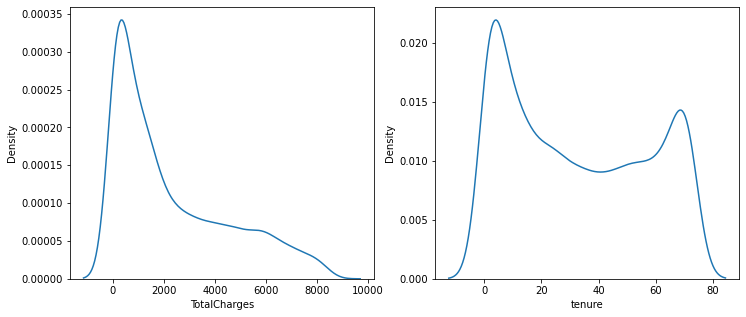

In [ ]:
# we will scale the TotalCharges colum as we will as tenure:
# but will plot the distribution first

def plot_kde():
    fig, ax = plt.subplots(1,2,figsize =(12,5))
    sns.kdeplot(ax= ax[0],data =features , x = 'TotalCharges')
    sns.kdeplot(ax= ax[1],data =features , x = 'tenure')


plot_kde()

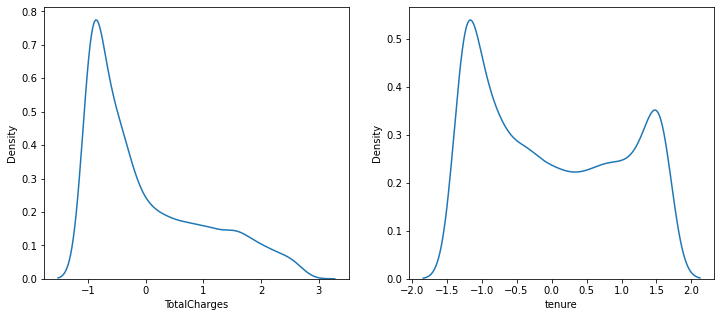

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features[['TotalCharges','tenure']] = scaler.fit_transform(features[['TotalCharges','tenure']]) # features[['TotalCharges']] instead of features['TotalCharges'] ... inorder to be 2D instead of one.

plot_kde()

# distribution doesn't change, then it is True Scaling


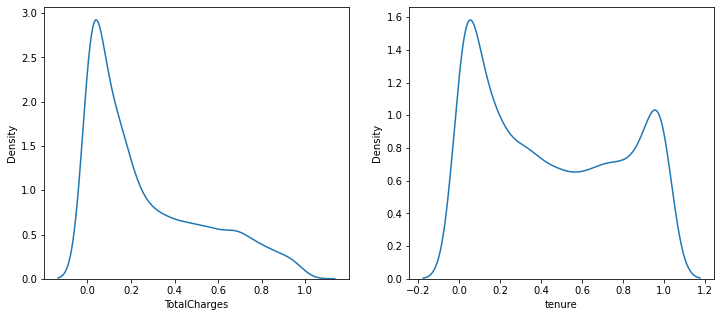

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
features[['TotalCharges','tenure']] = scaler.fit_transform(features[['TotalCharges','tenure']]) # features[['TotalCharges']] instead of features['TotalCharges'] ... inorder to be 2D instead of one.
plot_kde()

# distribution doesn't change, then it is True Scaling
# we used the MinMaxScaler in order to make our values between 0 & 1 as the following encoding:

###  3- Encoding:

In [ ]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.compose import make_column_transformer

label = LabelEncoder().fit_transform(label)

transformer = make_column_transformer( (OneHotEncoder(), cat_cols) , remainder='passthrough')

transformed = transformer.fit_transform(features[cat_cols])

cols = [l[l.index("_")+2:] for l in transformer.get_feature_names()] # for renaming the columns

transformed_df = pd.DataFrame(transformed, columns=cols)
transformed_df

combined = np.c_[transformed_df,features[['TotalCharges','tenure']],label]

combined_col = list(transformed_df.columns) + ['TotalCharges','tenure','Churn']

final_df = pd.DataFrame(combined,columns = combined_col)
final_df['Churn']

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7016    0.0
7017    0.0
7018    0.0
7019    1.0
7020    0.0
Name: Churn, Length: 7021, dtype: float64

###  3- Splitting data:

In [ ]:
from sklearn.model_selection import train_test_split 

x = final_df.loc[:,:'tenure']
y = final_df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


###  4- Fitting the models:

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
clf = svm.SVC(kernel='linear',C=1).fit(x_train,y_train)
pred = clf.predict(x_val)
print(accuracy_score(y_val,pred))

# accuracy_score is not trustworthy in classification. so I use F1-Score

print(f1_score(y_val,pred))
print(precision_score(y_val,pred))
print(recall_score(y_val,pred))

0.7941595441595442
0.6089309878213803
0.6859756097560976
0.5474452554744526


In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression().fit(x_train,y_train)
pred = logit.predict(x_val)


print(f1_score(y_val,pred))


0.6103542234332425


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
pred = knn.predict(x_val)

print(f1_score(y_val,pred))


0.5447368421052632


> ### Best Model from training is Logistic Regression
> ### It's testing error is:

In [ ]:

print(  f1_score( y_test , logit.predict(x_test) )  )


0.5669781931464174


<a id='Conclusion'></a>
## Conclusion:

### Results:

* I used three classification models:

> `Support Vector Machine` with Training F1-score = 60 % 

> `Logistic Regression` with Training F1-Score = 61 %

> `K-Nearest Neighbour` with Training F1-Score = 54 %

* Best one of them was `Logistic Regression` which has test F1-Score = 57 %

### Limitations:

* `SeniorCitizen` column is not obvious as 0 or 1.

____________________________________________________________